Attributes of Dataset

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea


In [1]:
#Getting the dataset from URL 
from urllib.request import urlretrieve
urlretrieve('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv', 'housing.csv')

('housing.csv', <http.client.HTTPMessage at 0x7957c5f85e40>)

In [2]:
#import required libraries
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Import dataset
d = pd.read_csv('housing.csv')

In [4]:
#viewing the dataset
d.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#Dataframe information and description
d.info()
d.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


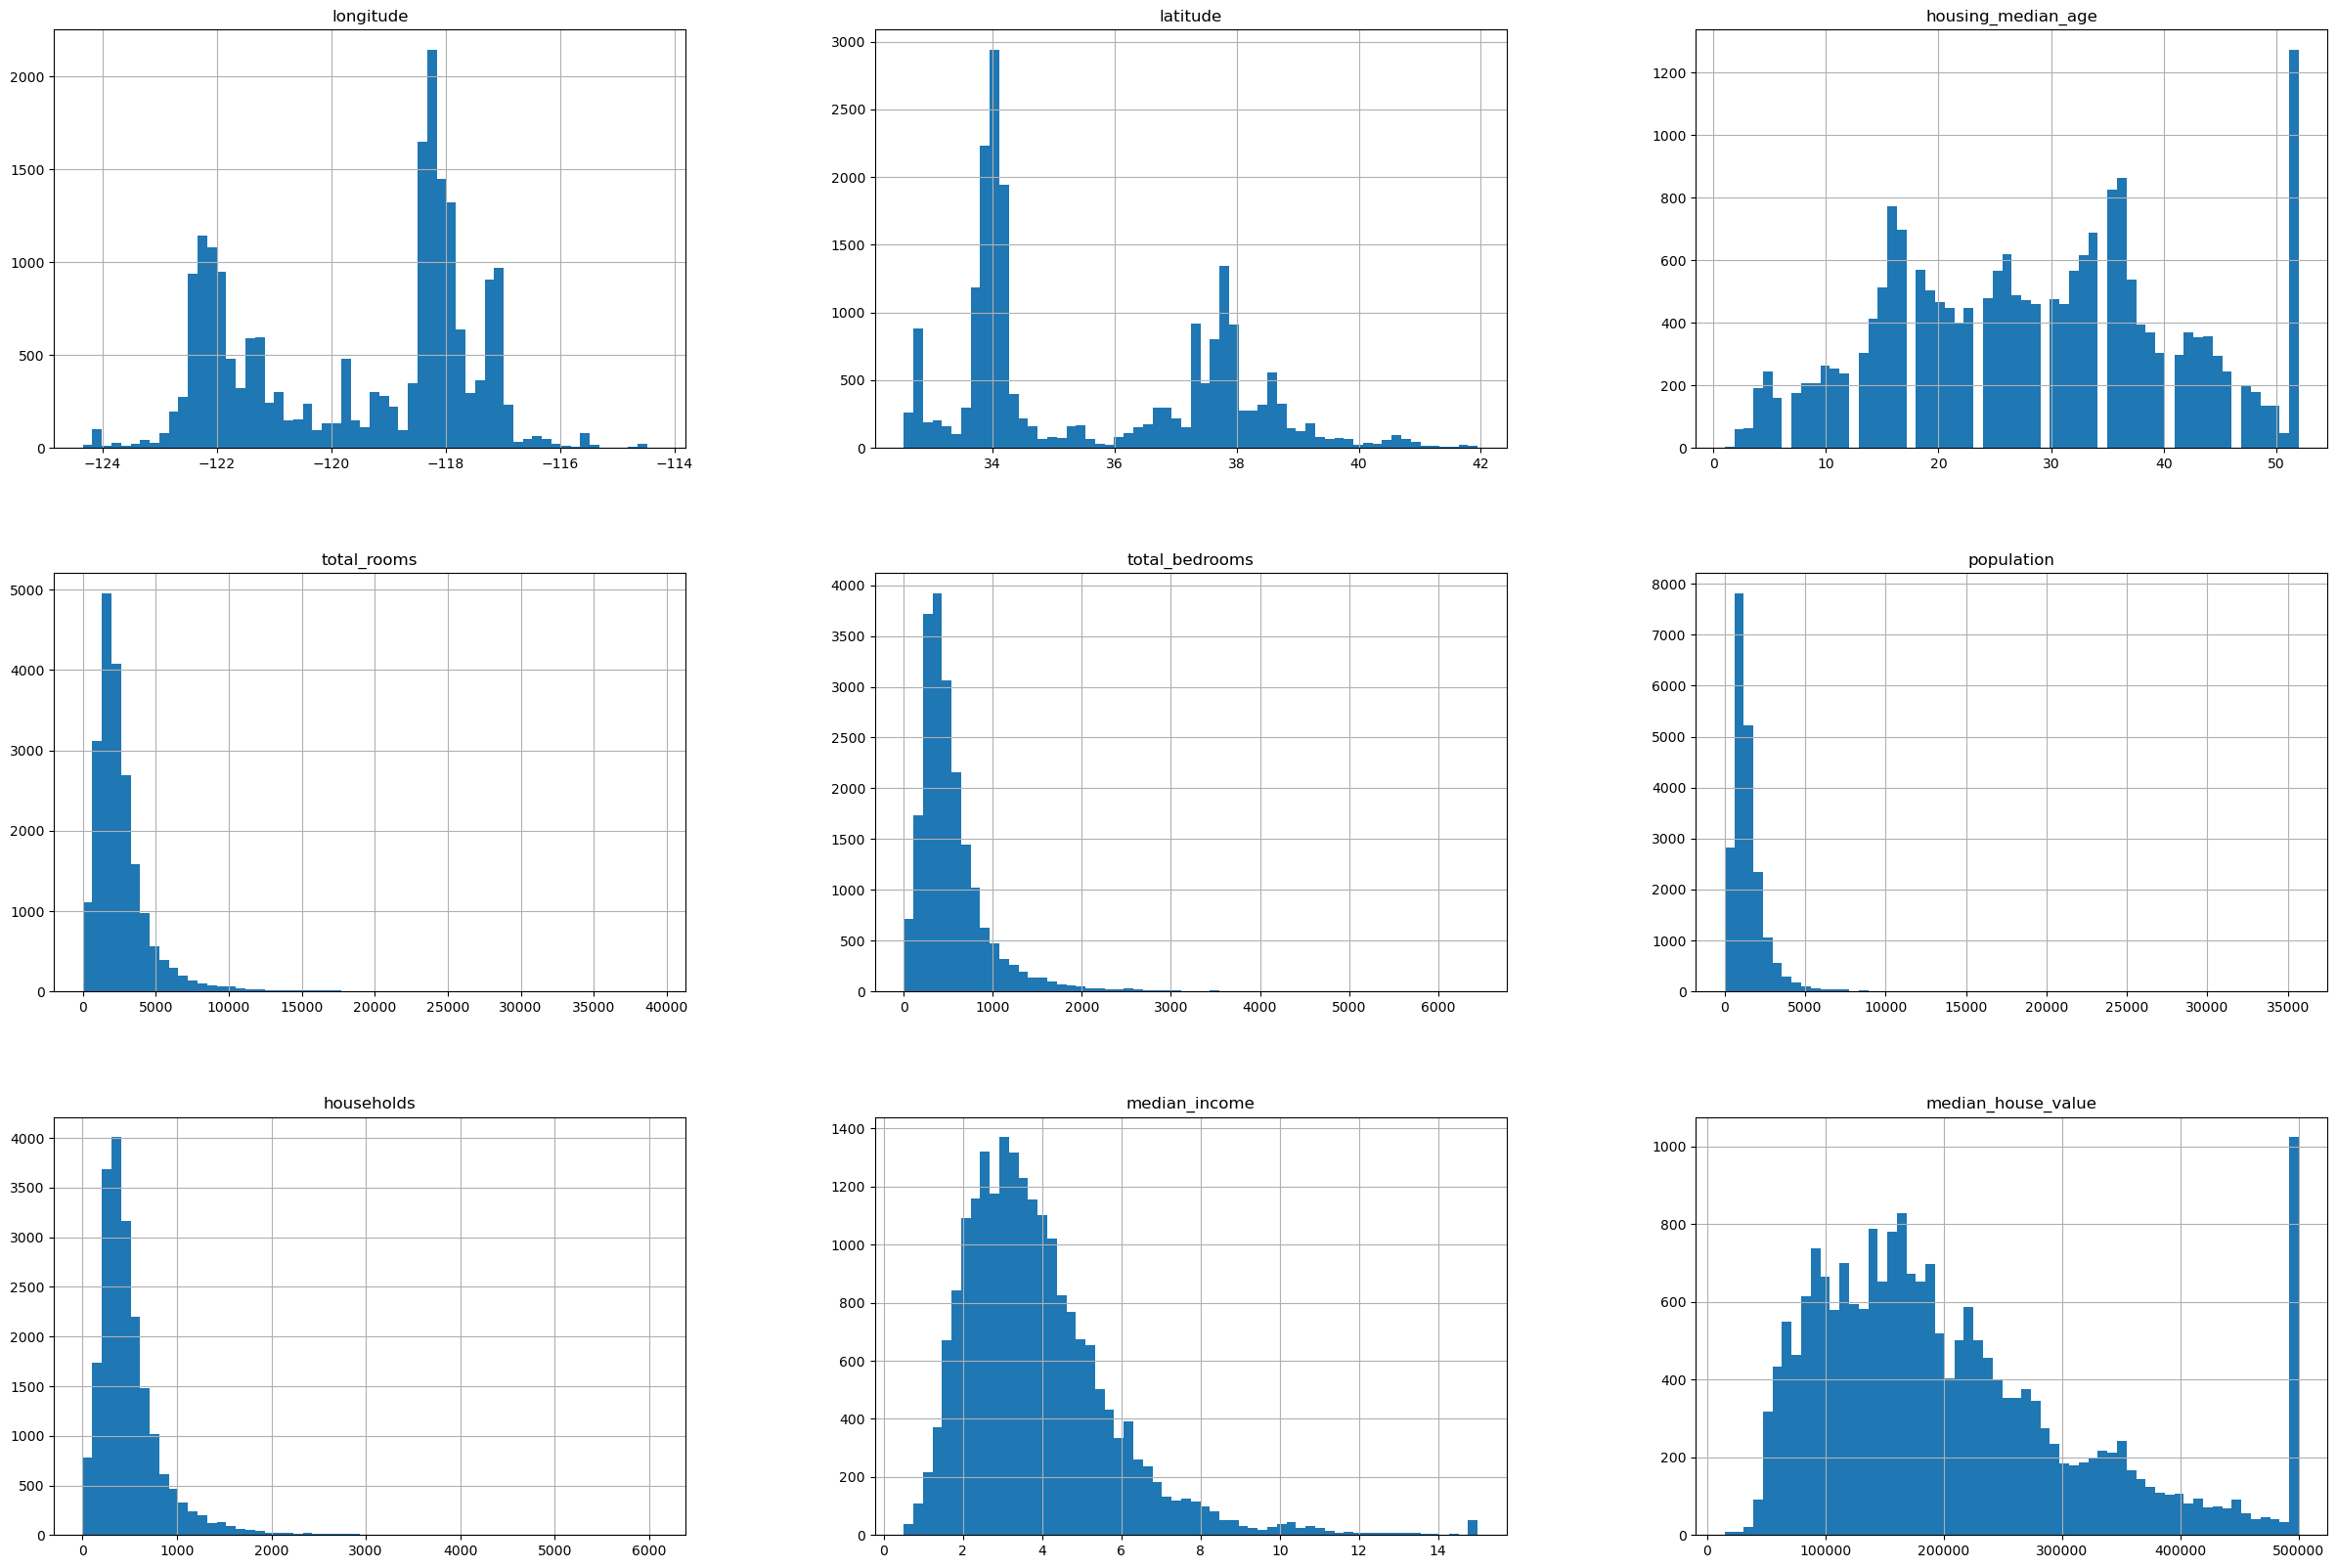

In [6]:
#Understanding the features of dataframe by plotting plots.
d.hist(bins = 60, figsize = (30,20))
plt.show()

<Axes: >

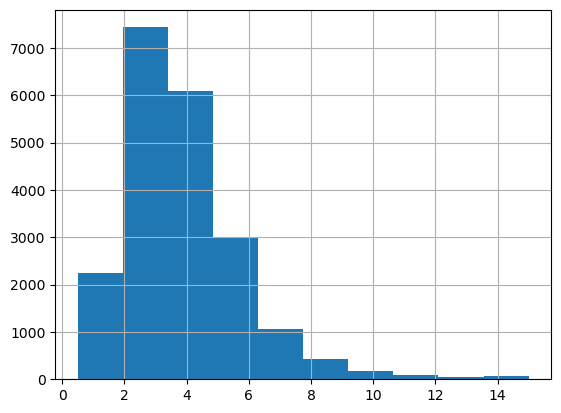

In [7]:
d["median_income"].hist()

In [8]:
#creating an attribute ranging from 0-6 og median_income
d["income_cat"] = pd.cut(d["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [9]:
d["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<Axes: >

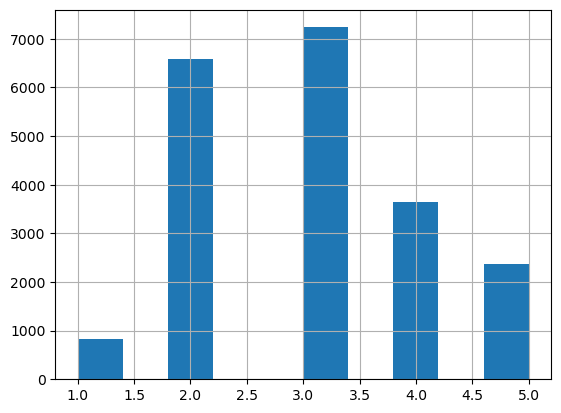

In [10]:
d["income_cat"].hist()

In [11]:
#Splitting the train and test data
#Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(d, d["income_cat"]):
    strat_train_set = d.loc[train_index]
    strat_test_set = d.loc[test_index]

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [13]:
d["income_cat"].value_counts() / len(d)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [14]:
#Comparing the randomly choosen test set and stratified test set
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(d, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(d),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set)}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.039826,0.039971,0.040213,0.973236,0.364964
2,0.318847,0.318798,0.324370,1.732260,-0.015195
3,0.350581,0.350533,0.358527,2.266446,-0.013820
4,0.176308,0.176357,0.167393,-5.056334,0.027480
5,0.114438,0.114341,0.109496,-4.318374,-0.084674


In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [16]:
df = strat_train_set.copy()

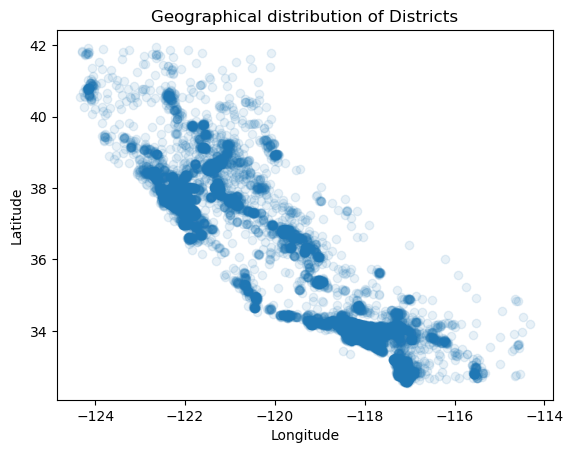

In [17]:
#Visualizing the distribution of location
plt.scatter(df.longitude, df.latitude, alpha = 0.1) #alpha parameter to highlight high-density places
plt.title('Geographical distribution of Districts')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

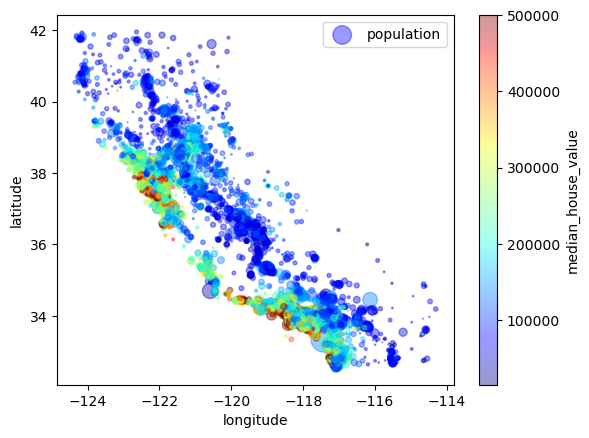

In [18]:
#Visualizing the distribution of location
#Same graph with more details
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=df.population/100, label="population", c="median_house_value", cmap="jet", colorbar=True)
plt.legend()

In [19]:
#Compute standard corelation coefficient between 'median_house_value' and all other attributes
std_corr = df.corr()
std_corr['median_house_value'].sort_values(ascending = False)

/tmp/ipykernel_33/243822893.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_corr = df.corr()


median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

From the above output observe that: as the correlation coefficient value reaches 1, the correlation of median_house_value and that attribute becomes strong positive.
And as the correlation coefficient value reaches -1, the correlation of median_house_value and that attribute becomes strong negative.

We can also state that, the most promising attribute to predict the median_house_value is the median_income.

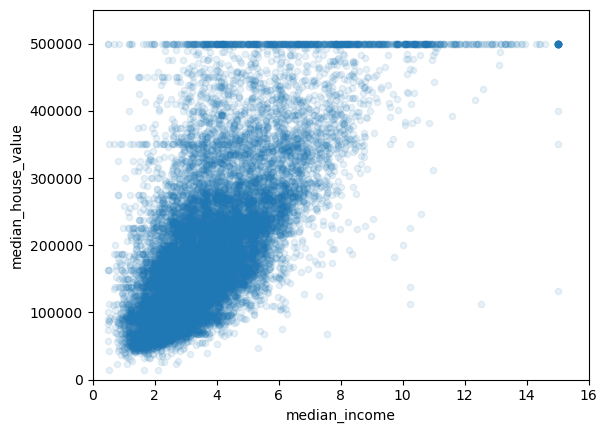

In [20]:
#Analyze the relation between median_house_value and median_income
df.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)
plt.axis([0, 16, 0, 550000])
plt.show()

In [21]:
#Combining Different attributes to observe correlation
df['rooms_per_household'] = df.total_rooms/df.households
df['population_per_household'] = df.population/df.households
df['bedrooms_per_rooms'] = df.total_bedrooms/df.total_rooms

In [22]:
std_corr = df.corr()
std_corr['median_house_value'].sort_values(ascending = False)

/tmp/ipykernel_33/3531559961.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  std_corr = df.corr()


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

rooms_per_household ia an important attribute as it describes the no of rooms requires depending on the no of people in the house.

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_rooms
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,3.168555,0.205784
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,2.623698,0.160714
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,2.223333,0.191595
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,1.859213,0.276505
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,3.167241,0.182692


In [24]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_rooms
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,3.096469,0.212873
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,11.584825,0.057378
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.692308,0.100000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,2.431352,0.175304
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,2.817661,0.203027
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,3.281420,0.239816
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1243.333333,1.000000


## Data Cleaning

Three ways to fix the missing values:

• Get rid of the whole attribute.
• Get rid of the corresponding districts.
• Set the values to some value (zero, the mean, the median, etc.).

In [25]:
df = strat_train_set.drop("median_house_value", axis=1) # drop house value for training set
df_house_value = strat_train_set["median_house_value"].copy()

In [26]:
#Importing Impute class from sklearn to handle missing values, as we want to replace all missing values with median of that attribute
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'median') #creating the instance of the class and specify what has to be done

#create a dataframe that contains only numerical values
df_num = df.drop('ocean_proximity', axis = 1)
imputer.fit(df_num)

SimpleImputer(strategy='median')

If we try to impute the whole dataframe, that contains differernt datatypes it throws an error :

#### imputer.fit(df)

ValueError: Cannot use median strategy with non-numeric data:
could not convert string to float: 'NEAR BAY'


In [27]:
#imputer stores the strategy values in 'imputer.statistics_' variable
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [28]:
df_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [29]:
#transform the fitted imputer to the dataset
X = imputer.transform(df_num)
print(type(X))

<class 'numpy.ndarray'>


In [30]:
#Convert the numpy array to pandas dataframe
df_df = pd.DataFrame(X, columns = df_num.columns)
df_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
1,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
3,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
4,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [31]:
df_cat = df[["ocean_proximity"]]
df_cat

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [32]:
#Transforming the 'string' datatype attribute into integer using one-hot-encoder.
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder( )
df_cat_encoder = encoder.fit_transform(df_cat)
df_cat_encoder

array([[1.],
       [4.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [33]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [34]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse = False)
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
df_extra_attribs = attr_adder.transform(df.values)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
df_num_tr = num_pipeline.fit_transform(df_num)


In [37]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
full_pipeline
df_prepared = full_pipeline.fit_transform(df)
df_prepared

array([[-0.94135046,  1.34743822,  0.02756357, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17178212, -1.19243966, -1.72201763, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.5707942 ,  1.31001828,  1.53856552, ...,  0.        ,
         0.        ,  0.        ],
       [-1.56080303,  1.2492109 , -1.1653327 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.28105026,  2.02567448, -0.13148926, ...,  0.        ,
         0.        ,  0.        ]])

In [38]:
df_prepared.shape

(16512, 16)

## Training the model

In [39]:
df_house_value

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [40]:
#Linear regression Model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(df_prepared, df_house_value)

LinearRegression()

In [41]:
print("Prediction :\n", np.round(lin_reg.predict(df_prepared[:10]), 2))
print("Actual_result :\n", list(df_house_value[:10]))

Prediction :
 [ 85657.9  305492.61 152056.46 186095.71 244550.68 206382.41 376422.06
 266569.81 151001.8   30119.48]
Actual_result :
 [72100.0, 279600.0, 82700.0, 112500.0, 238300.0, 165700.0, 412300.0, 349600.0, 181300.0, 500001.0]


Soo many variations in the actual and predicted value. Let's compute the cost function(root mean absolute error) of the training set.

In [42]:
from sklearn.metrics import mean_absolute_error
predict_house_value = lin_reg.predict(df_prepared)
lin_rmae = mean_absolute_error(df_house_value, predict_house_value)
lin_rmae

49438.66860915802

$49,439 prediction error, states that the linear model is underfitted on training dataset.
Either we can add more features to training set and run the model or choose a better model.

In [43]:
#Decision tree regression Model
from sklearn.tree import DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor()
decision_tree_reg.fit(df_prepared, df_house_value)

DecisionTreeRegressor()

In [44]:
predict_house_value = decision_tree_reg.predict(df_prepared)
tree_rmae = mean_absolute_error(df_house_value, predict_house_value)
tree_rmae

0.0

Zero error means that every 'df_house_value = predict_house_value', when we test the model then there will be errors-as the test dataset is unknown to the model. In simple, this decision tree regression overfits the training dataset.

## Better Evaluation using Cross-Validation 

In [45]:
#Cross-Validation with Decision Tree Regression
from sklearn.model_selection import cross_val_score
tree_scores = cross_val_score(decision_tree_reg, df_prepared, df_house_value, scoring = 'neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)
tree_rmse_scores

array([72509.62191584, 70764.11936504, 68555.41303395, 72251.07757972,
       68132.18936226, 78484.97859994, 72155.97942885, 72544.6815829 ,
       66997.64207078, 69098.82617202])

In [46]:
def show_scores(scores):
    print('Scores :', scores)
    print('Mean :', scores.mean())
    print('Standard Deviation :', scores.std())
    

In [47]:
show_scores(tree_rmse_scores)

Scores : [72509.62191584 70764.11936504 68555.41303395 72251.07757972
 68132.18936226 78484.97859994 72155.97942885 72544.6815829
 66997.64207078 69098.82617202]
Mean : 71149.45291112989
Standard Deviation : 3118.610906591448


 71,398(Decision tree error with cross-validation) >> 49,439(linear regression error)

In [48]:
#Cross-Validation with Linear Regression Model
lin_scores = cross_val_score(lin_reg, df_prepared, df_house_value, scoring = 'neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([71762.76364394, 64114.99166359, 67771.17124356, 68635.19072082,
       66846.14089488, 72528.03725385, 73997.08050233, 68802.33629334,
       66443.28836884, 70139.79923956])

In [49]:
show_scores(lin_rmse_scores)

Scores : [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean : 69104.07998247063
Standard Deviation : 2880.3282098180694


In [50]:
#Random Forest regression Model
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor()
rand_reg.fit(df_prepared, df_house_value)

RandomForestRegressor()

In [51]:
predict_house_value = rand_reg.predict(df_prepared)
rand_rmae = mean_absolute_error(df_house_value, predict_house_value)
rand_rmae

12101.130228318798

12,031 rmae is better than 49,439 and 71,398 rmae

In [52]:
#Cross-Validation with Random Forest Regression Model
rand_scores = cross_val_score(rand_reg, df_prepared, df_house_value, scoring = 'neg_mean_squared_error', cv=10)
rand_rmse_scores = np.sqrt(-rand_scores)
rand_rmse_scores
show_scores(rand_rmse_scores)

Scores : [51140.07758066 49145.8293363  46817.80883803 52080.13200626
 47323.64320726 51882.12433576 52394.39827299 49770.14608483
 49192.26067453 54048.76002547]
Mean : 50379.518036207766
Standard Deviation : 2204.052833770574


In [53]:
#Support Vector Machine regression Model
from sklearn.svm import SVR
svr_reg = SVR()
svr_reg.fit(df_prepared, df_house_value)
predict_house_value = svr_reg.predict(df_prepared)
svr_rmae = mean_absolute_error(df_house_value, predict_house_value)
svr_rmae

88040.1159064173

SVM not a good option for this training set.

## Fine-Tune the model

Grid Search

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators' : [3,10,30], 'max_features' : [2,4,6,8]},
             {'bootstrap' : [False], 'n_estimators' : [3,10], 'max_features' : [2,3,4]}]
grid_search = GridSearchCV(rand_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error')
grid_search.fit(df_prepared, df_house_value)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [55]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [56]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [57]:
cv_res = grid_search.cv_results_

In [58]:
for mean_score,params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(np.sqrt(-mean_score),params)

63310.34639853103 {'max_features': 2, 'n_estimators': 3}
55451.35591357765 {'max_features': 2, 'n_estimators': 10}
52642.30582089634 {'max_features': 2, 'n_estimators': 30}
60185.90280723031 {'max_features': 4, 'n_estimators': 3}
52681.49482864733 {'max_features': 4, 'n_estimators': 10}
50379.37288692792 {'max_features': 4, 'n_estimators': 30}
59190.60257336224 {'max_features': 6, 'n_estimators': 3}
52648.005837395045 {'max_features': 6, 'n_estimators': 10}
50121.01611637042 {'max_features': 6, 'n_estimators': 30}
59044.684439411976 {'max_features': 8, 'n_estimators': 3}
52246.71086199655 {'max_features': 8, 'n_estimators': 10}
50148.97490316884 {'max_features': 8, 'n_estimators': 30}
62114.589444627665 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54004.08256950609 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59944.53839323201 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52668.56951432165 {'bootstrap': False, 'max_features': 3, 'n_estimators':

## Evaluating the model on Test set

In [59]:
from sklearn.metrics import mean_squared_error
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1) # drop house value for training set
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_prediction = final_model.predict(X_test_prepared)

final_mae = mean_squared_error(y_test, final_prediction)
final_rmae = np.sqrt(final_mae)

In [60]:
final_rmae

48382.83519538283